# **1. Library**

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import plotly.graph_objs as go
import plotly.offline as py

from statsmodels.stats.outliers_influence import variance_inflation_factor

from datetime import datetime

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# **2. Utils**

## **2.1. reduce memory**

In [ ]:
# reduce memory

def reduce_mem_usage(df, verbose=True):
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  start_mem = df.memory_usage().sum() / 1024**2    
  for col in df.columns:
    col_type = df[col].dtypes
    if col_type in numerics:
      c_min = df[col].min()
      c_max = df[col].max()
      if str(col_type)[:3] == 'int':
        if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
          df[col] = df[col].astype(np.int8)
        elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
          df[col] = df[col].astype(np.int16)
        elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
          df[col] = df[col].astype(np.int32)
        elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
          df[col] = df[col].astype(np.int64)  
      else:
          if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
            df[col] = df[col].astype(np.float16)
          elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            df[col] = df[col].astype(np.float32)
          else:
            df[col] = df[col].astype(np.float64)    
  end_mem = df.memory_usage().sum() / 1024**2
  if verbose: 
    print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
  return df

# **3. Read data**

In [ ]:
# change here

train_des_dir = '/content/drive/MyDrive/Colab Notebooks/VIETTEL TRAINING/Mini Project/data/Data Dictionary.xlsx'
train_dir = '/content/drive/MyDrive/Colab Notebooks/VIETTEL TRAINING/Mini Project/data/train.csv'
test_dir = '/content/drive/MyDrive/Colab Notebooks/VIETTEL TRAINING/Mini Project/data/test.csv'
hist_des_dir = '/content/drive/MyDrive/Colab Notebooks/VIETTEL TRAINING/Mini Project/data/Data Dictionary.xlsx'
hist_dir = '/content/drive/MyDrive/Colab Notebooks/VIETTEL TRAINING/Mini Project/data/historical_transactions.csv'
new_des_dir = '/content/drive/MyDrive/Colab Notebooks/VIETTEL TRAINING/Mini Project/data/Data Dictionary.xlsx'
new_dir = '/content/drive/MyDrive/Colab Notebooks/VIETTEL TRAINING/Mini Project/data/new_merchant_transactions.csv'
mer_des_dir = '/content/drive/MyDrive/Colab Notebooks/VIETTEL TRAINING/Mini Project/data/Data Dictionary.xlsx'
mer_dir = '/content/drive/MyDrive/Colab Notebooks/VIETTEL TRAINING/Mini Project/data/merchants.csv'

## **3.1. train + test**


### **3.1.1. train**

In [ ]:
train_des = pd.read_excel(train_des_dir, sheet_name='train', skiprows=[0, 1])
train_des

,Columns,Description
0,card_id,Unique card identifier
1,first_active_month,"'YYYY-MM', month of first purchase"
2,feature_1,Anonymized card categorical feature
3,feature_2,Anonymized card categorical feature
4,feature_3,Anonymized card categorical feature
5,target,Loyalty numerical score calculated 2 months af...


In [ ]:
train = pd.read_csv(train_dir)
train = reduce_mem_usage(train)

Mem. usage decreased to  4.04 Mb (56.2% reduction)


In [ ]:
train.shape

(201917, 6)

In [ ]:
train.head(10)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820312
1,2017-01,C_ID_3d0044924f,4,1,0,0.392822
2,2016-08,C_ID_d639edf6cd,2,2,0,0.687988
3,2017-09,C_ID_186d6a6901,4,3,0,0.142456
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159790
5,2016-09,C_ID_0894217f2f,4,2,0,0.871582
6,2016-12,C_ID_7e63323c00,3,2,1,0.230103
7,2017-09,C_ID_dfa21fc124,3,2,1,2.136719
8,2017-08,C_ID_fe0fdac8ea,2,1,0,-0.065430
9,2016-08,C_ID_bf62c0b49d,2,2,0,0.300049


In [ ]:
train.describe()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,NaN
std,1.186160,0.751362,0.495683,0.000000
min,1.000000,1.000000,0.000000,-33.218750
25%,2.000000,1.000000,0.000000,-0.883301
50%,3.000000,2.000000,1.000000,-0.023438
75%,4.000000,2.000000,1.000000,0.765625
max,5.000000,3.000000,1.000000,17.968750


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_active_month  201917 non-null  object 
 1   card_id             201917 non-null  object 
 2   feature_1           201917 non-null  int8   
 3   feature_2           201917 non-null  int8   
 4   feature_3           201917 non-null  int8   
 5   target              201917 non-null  float16
dtypes: float16(1), int8(3), object(2)
memory usage: 4.0+ MB


In [ ]:
train.isnull().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

### **3.1.2. test**

In [ ]:
test = pd.read_csv(test_dir)
test = reduce_mem_usage(test)

Mem. usage decreased to  2.24 Mb (52.5% reduction)


In [ ]:
test.shape

(123623, 5)

In [ ]:
test.head(10)

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1
5,2017-07,C_ID_5814b4f13c,5,1,1
6,2017-10,C_ID_a1b3c75277,1,2,0
7,2017-02,C_ID_f7cada36d3,3,1,1
8,2017-07,C_ID_9d2bc8dfc4,4,3,0
9,2016-03,C_ID_6d8dba8475,5,1,1


In [ ]:
test.describe()

,feature_1,feature_2,feature_3
count,123623.00000,123623.000000,123623.000000
mean,3.10926,1.741796,0.564377
std,1.18911,0.749195,0.495840
min,1.00000,1.000000,0.000000
25%,2.00000,1.000000,0.000000
50%,3.00000,2.000000,1.000000
75%,4.00000,2.000000,1.000000
max,5.00000,3.000000,1.000000


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   first_active_month  123622 non-null  object
 1   card_id             123623 non-null  object
 2   feature_1           123623 non-null  int8  
 3   feature_2           123623 non-null  int8  
 4   feature_3           123623 non-null  int8  
dtypes: int8(3), object(2)
memory usage: 2.2+ MB


In [ ]:
# null

test.isnull().sum()

first_active_month    1
card_id               0
feature_1             0
feature_2             0
feature_3             0
dtype: int64

In [ ]:
test['first_active_month'].value_counts()

2017-09    8805
2017-10    8451
2017-08    8299
2017-11    7807
2017-07    7344
           ... 
2012-03      10
2012-02       4
2011-11       3
2011-12       2
2012-01       1
Name: first_active_month, Length: 75, dtype: int64

In [ ]:
test['first_active_month'].fillna('2017-09', inplace=True)

In [ ]:
# null

test.isnull().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
dtype: int64

### **3.1.3. Insight**

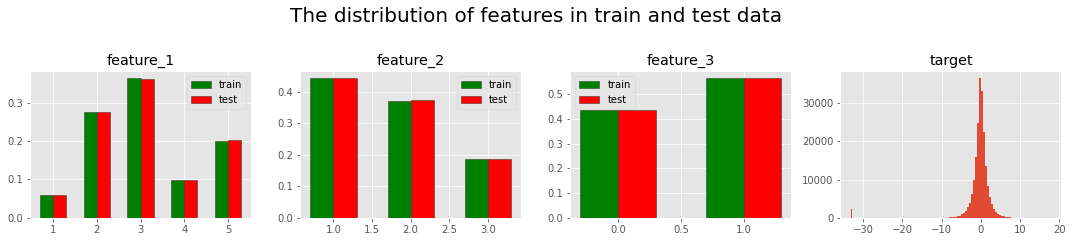

In [ ]:
plt.figure(figsize=[15, 5])
plt.suptitle('The distribution of features in train and test data', fontsize=20, y=1.1)
for n, k in enumerate(['feature_1', 'feature_2', 'feature_3', 'target']):
  plt.subplot(2, 4, n + 1)
  if k is not 'target':
    train_bar = train[k].value_counts() / train.shape[0]
    plt.bar(train_bar.index, train_bar, label=('train'), align='edge', width=-0.3, edgecolor=[0.2]*3, color=['green'])
    test_bar = test[k].value_counts() / test.shape[0]
    plt.bar(test_bar.index, test_bar, label=('test'), align='edge', width=0.3, edgecolor=[0.2]*3, color=['red'])
    plt.title(k)
    plt.legend()
  else:
    plt.hist(train[k], bins = 100)
    plt.title(k)
  plt.tight_layout()
plt.tight_layout()
plt.show()

**Observation**
- In feature_1, feature_2 and feature_3 train and test data are equally distributed.
- Outlier values in target features


 The number of outliers in the data is: 2207
 The number of non-outliers in the data is: 199710


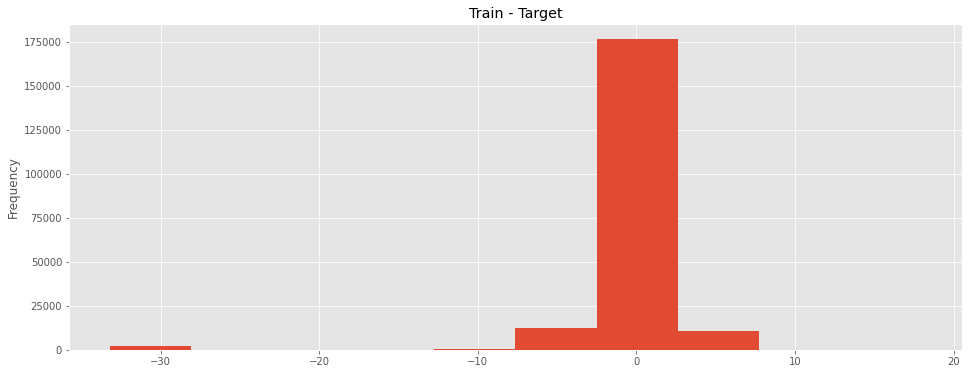

In [ ]:
# train - target

fig, ax = plt.subplots(1, 1, figsize = (16, 6))
plt.title('Train - Target')
train['target'].plot(kind='hist')

outliers_in_target= train.loc[train['target']< -30]
print(' The number of outliers in the data is:', outliers_in_target.shape[0])
non_outliers_in_target= train.loc[train['target'] >=-30]
print(' The number of non-outliers in the data is:', non_outliers_in_target.shape[0])

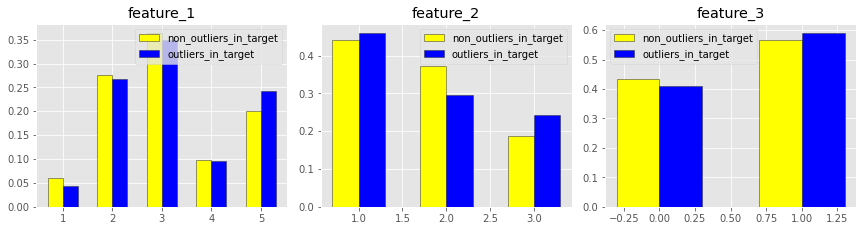

In [ ]:
plt.figure(figsize=[12, 6])
for i, j in enumerate(['feature_1','feature_2','feature_3','target']):
  if j is not 'target':
    plt.subplot(2, 3, i + 1)
    non_outliers = non_outliers_in_target[j].value_counts() / non_outliers_in_target.shape[0]
    plt.bar(non_outliers.index, non_outliers, label=('non_outliers_in_target'), align='edge', width=-0.3, edgecolor=[0.2]*3, color=['yellow'])
    outliers = outliers_in_target[j].value_counts() /outliers_in_target.shape[0]
    plt.bar(outliers.index, outliers, label=('outliers_in_target'), align='edge', width=0.3, edgecolor=[0.2]*3, color=['blue'])
    plt.title(j)
    plt.legend()
plt.tight_layout()
plt.show()

**Observation:**

1.  In feature_1, feature_2 and feature_3 difference between outliers and non-outliers are very small. So, It means if we include this values it will definitely be problem for our training. So, It is better to remove this values from our dataset.  




In [ ]:
X_train = train.drop(['first_active_month', 'card_id', 'target'], axis=1)
vif_train = pd.DataFrame()
vif_train["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_train["features"] = X_train.columns
vif_train

,VIF Factor,features
0,0.000327,feature_1
1,0.000158,feature_2
2,0.000653,feature_3


In [ ]:
X_train.corr()

,feature_1,feature_2,feature_3
feature_1,1.000000,-0.130969,0.583092
feature_2,-0.130969,1.000000,0.060925
feature_3,0.583092,0.060925,1.000000


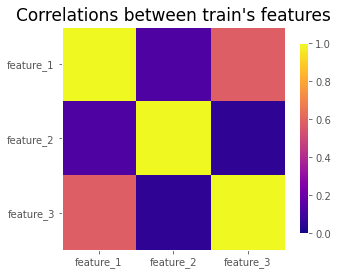

In [ ]:
corrs_train = np.abs(X_train.corr())
plt.figure(figsize=[5,5])
plt.imshow(corrs_train, cmap='plasma', vmin=0, vmax=1)
plt.colorbar(shrink=0.7)
plt.xticks(range(corrs_train.shape[0]), list(corrs_train.columns))
plt.yticks(range(corrs_train.shape[0]), list(corrs_train.columns))
plt.title('Correlations between train\'s features', fontsize=17)
plt.grid(False)
plt.show()

In [ ]:
X_test = test.drop(['first_active_month', 'card_id'], axis=1)
vif_test = pd.DataFrame()
vif_test["VIF Factor"] = [variance_inflation_factor(X_test.values, i) for i in range(X_test.shape[1])]
vif_test["features"] = X_test.columns
vif_test

,VIF Factor,features
0,0.000284,feature_1
1,0.000198,feature_2
2,-0.005716,feature_3


In [ ]:
X_test.corr()

,feature_1,feature_2,feature_3
feature_1,1.000000,-0.132055,0.582793
feature_2,-0.132055,1.000000,0.065346
feature_3,0.582793,0.065346,1.000000


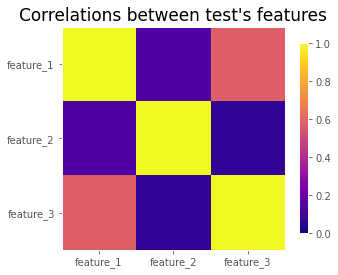

In [ ]:
corrs_test = np.abs(X_test.corr())
plt.figure(figsize=[5,5])
plt.imshow(corrs_test, cmap='plasma', vmin=0, vmax=1)
plt.colorbar(shrink=0.7)
plt.xticks(range(corrs_test.shape[0]), list(corrs_test.columns))
plt.yticks(range(corrs_test.shape[0]), list(corrs_test.columns))
plt.title('Correlations between test\'s features', fontsize=17)
plt.grid(False)
plt.show()

**Observation:**
- VIF score is low

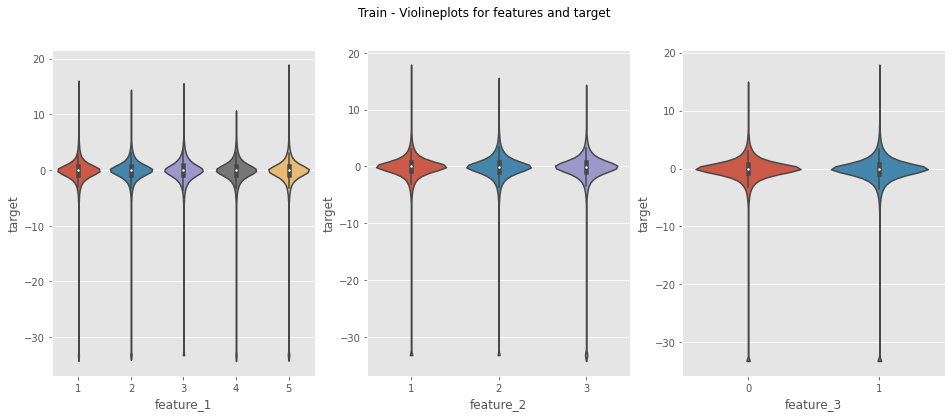

In [ ]:
# train - target

fig, ax = plt.subplots(1, 3, figsize = (16, 6))
plt.suptitle('Train - Violineplots for features and target')
sns.violinplot(x="feature_1", y="target", data=train, ax=ax[0], title='feature_1')
sns.violinplot(x="feature_2", y="target", data=train, ax=ax[1], title='feature_2')
sns.violinplot(x="feature_3", y="target", data=train, ax=ax[2], title='feature_3')

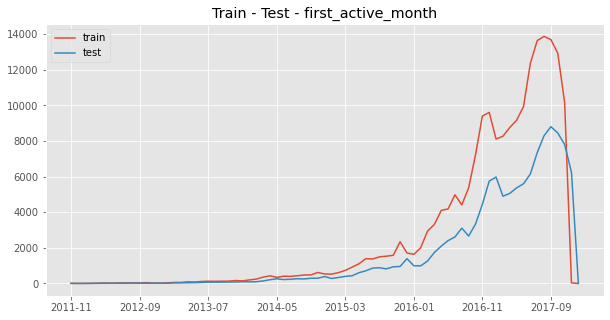

In [ ]:
# train - test - first_active_month	

labels=['train','test']
ax = train['first_active_month'].value_counts().sort_index().plot(figsize=(10, 5))
ax = test['first_active_month'].value_counts().sort_index().plot(figsize=(10,5))
ax.set_title("Train - Test - first_active_month")
ax.legend(labels)

## **3.2. historical_transactions**

In [ ]:
historical_transactions_des = pd.read_excel(hist_des_dir, sheet_name='history', skiprows=[0, 1])
historical_transactions_des

,Columns,Description
0,card_id,Card identifier
1,month_lag,month lag to reference date
2,purchase_date,Purchase date
3,authorized_flag,"Y' if approved, 'N' if denied"
4,category_3,anonymized category
5,installments,number of installments of purchase
6,category_1,anonymized category
7,merchant_category_id,Merchant category identifier (anonymized )
8,subsector_id,Merchant category group identifier (anonymized )
9,merchant_id,Merchant identifier (anonymized)


In [ ]:
historical_transactions = pd.read_csv(hist_dir, parse_dates=['purchase_date'])

In [ ]:
historical_transactions.shape

(29112361, 14)

In [ ]:
historical_transactions.isnull().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

In [ ]:
historical_transactions['category_2'].value_counts()

1.0    15177199
3.0     3911795
5.0     3725915
4.0     2618053
2.0     1026535
Name: category_2, dtype: int64

In [ ]:
historical_transactions['category_3'].value_counts()

A    15411747
B    11677522
C     1844933
Name: category_3, dtype: int64

In [ ]:
historical_transactions['merchant_id'].value_counts()

M_ID_00a6ca8a8a    1115097
M_ID_e5374dabc0     428619
M_ID_9139332ccc     361385
M_ID_50f575c681     183894
M_ID_fc7d7969c3     177040
                    ...   
M_ID_7311ce349d          1
M_ID_7e15c41a2f          1
M_ID_cff59944bd          1
M_ID_b57d8655a1          1
M_ID_833a1f8ad9          1
Name: merchant_id, Length: 326311, dtype: int64

In [ ]:
historical_transactions['category_2'].fillna(1.0, inplace=True)
historical_transactions['category_3'].fillna('A', inplace=True)
historical_transactions['merchant_id'].fillna('M_ID_00a6ca8a8a', inplace=True)

In [ ]:
historical_transactions.replace([-np.inf, np.inf], np.nan, inplace=True)
historical_transactions['category_3'].replace({'A':0, 'B':1, 'C':2}, inplace=True)
historical_transactions['category_1'].replace({'N':0, 'Y':1}, inplace=True)
historical_transactions['authorized_flag'].replace({'N':0, 'Y':1}, inplace=True)

In [ ]:
historical_transactions = reduce_mem_usage(historical_transactions)

Mem. usage decreased to 1166.08 Mb (62.5% reduction)


In [ ]:
historical_transactions.head(10)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,1,C_ID_4e6213e9bc,88,0,0,0,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,1,C_ID_4e6213e9bc,88,0,0,0,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,1,C_ID_4e6213e9bc,88,0,0,0,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,1,C_ID_4e6213e9bc,88,0,0,0,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,1,C_ID_4e6213e9bc,88,0,0,0,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37
5,1,C_ID_4e6213e9bc,333,0,0,0,80,M_ID_50af771f8d,0,-0.734887,2018-02-24 08:45:05,1.0,9,37
6,1,C_ID_4e6213e9bc,88,0,0,0,278,M_ID_5e8220e564,-11,-0.716855,2017-03-21 00:10:51,1.0,16,37
7,1,C_ID_4e6213e9bc,3,0,0,0,80,M_ID_9d41786a50,-3,-0.657049,2017-11-18 20:05:55,1.0,16,37
8,1,C_ID_4e6213e9bc,88,0,0,0,80,M_ID_979ed661fc,-8,-0.737967,2017-06-01 22:02:56,1.0,16,37
9,1,C_ID_4e6213e9bc,88,0,0,0,80,M_ID_74ba14b5fc,-11,-0.715352,2017-03-16 15:41:22,1.0,16,37


In [ ]:
historical_transactions.describe()

,authorized_flag,city_id,category_1,installments,category_3,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,29112361.0,2.911236e+07,2.911236e+07
mean,9.135450e-01,1.293256e+02,7.158571e-02,6.484954e-01,5.278647e-01,4.810130e+02,-4.487294e+00,6.134567e-02,NaN,1.056679e+01,2.684839e+01
std,2.810348e-01,1.042563e+02,2.578007e-01,2.795577e+00,6.131633e-01,2.493757e+02,3.588800e+00,1.123521e+03,0.0,6.366927e+00,9.692793e+00
min,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.300000e+01,-7.469078e-01,1.0,-1.000000e+00,-1.000000e+00
25%,1.000000e+00,5.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.070000e+02,-7.000000e+00,-7.203559e-01,1.0,9.000000e+00,1.900000e+01
50%,1.000000e+00,9.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.540000e+02,-4.000000e+00,-6.883495e-01,1.0,9.000000e+00,2.900000e+01
75%,1.000000e+00,2.120000e+02,0.000000e+00,1.000000e+00,1.000000e+00,7.050000e+02,-2.000000e+00,-6.032543e-01,3.0,1.600000e+01,3.400000e+01
max,1.000000e+00,3.470000e+02,1.000000e+00,9.990000e+02,2.000000e+00,8.910000e+02,0.000000e+00,6.010604e+06,5.0,2.400000e+01,4.100000e+01


In [ ]:
historical_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
 #   Column                Dtype         
---  ------                -----         
 0   authorized_flag       int8          
 1   card_id               object        
 2   city_id               int16         
 3   category_1            int8          
 4   installments          int16         
 5   category_3            int8          
 6   merchant_category_id  int16         
 7   merchant_id           object        
 8   month_lag             int8          
 9   purchase_amount       float32       
 10  purchase_date         datetime64[ns]
 11  category_2            float16       
 12  state_id              int8          
 13  subsector_id          int8          
dtypes: datetime64[ns](1), float16(1), float32(1), int16(3), int8(6), object(2)
memory usage: 1.1+ GB


In [ ]:
group_data_frame = historical_transactions.groupby('card_id')
group_data_frame = group_data_frame['purchase_amount'].size().reset_index()
group_data_frame.columns = ['card_id', 'number_of_historical_transactions']
data_frame_train = pd.merge(train, group_data_frame, on='card_id', how='left')
data_frame_test = pd.merge(test, group_data_frame, on='card_id', how='left')

In [ ]:
data_frame_train

,first_active_month,card_id,feature_1,feature_2,feature_3,target,number_of_historical_transactions
0,2017-06,C_ID_92a2005557,5,2,1,-0.820312,260
1,2017-01,C_ID_3d0044924f,4,1,0,0.392822,350
2,2016-08,C_ID_d639edf6cd,2,2,0,0.687988,43
3,2017-09,C_ID_186d6a6901,4,3,0,0.142456,77
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159790,133
...,...,...,...,...,...,...,...
201912,2017-09,C_ID_963962de2c,3,2,1,-2.740234,46
201913,2015-10,C_ID_1314773c0b,3,1,1,0.312988,47
201914,2017-08,C_ID_7666735b3d,4,3,0,0.093506,87
201915,2016-07,C_ID_73f5a0efd0,3,2,1,-4.675781,26


In [ ]:
target_feature = 'target'

count_series = data_frame_train.groupby('number_of_historical_transactions')[target_feature].mean()
count_series = count_series.sort_index()
count_series = count_series[:-60]

def scatt_pl (count_series, color):
  tr = go.Scatter(x=count_series.index[::-1], y=count_series.values[::-1], showlegend=False, marker=dict(color=color,),)
  return tr

tr = scatt_pl(count_series,'green')

layout = go.Layout(
    title="This is loyalty score by number of historical transactions",
    xaxis=dict(title="COUNT" ),
    yaxis=dict(title="VALUES")) 

data = [tr]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='historical_transactions')

In [ ]:
count_series

number_of_historical_transactions
2      -0.302979
3       0.140503
4       0.168945
5       0.225952
6       0.121399
          ...   
1078   -1.061523
1081   -0.178589
1083    0.273682
1086   -0.773926
1089   -0.774902
Name: target, Length: 963, dtype: float16

In [ ]:
data_frame_train[data_frame_train['target'] == -33.218750]['number_of_historical_transactions'].sum()

180105

**Observation:**
- It means -33.21928 is that target value which is most used in the historical transaction card_id

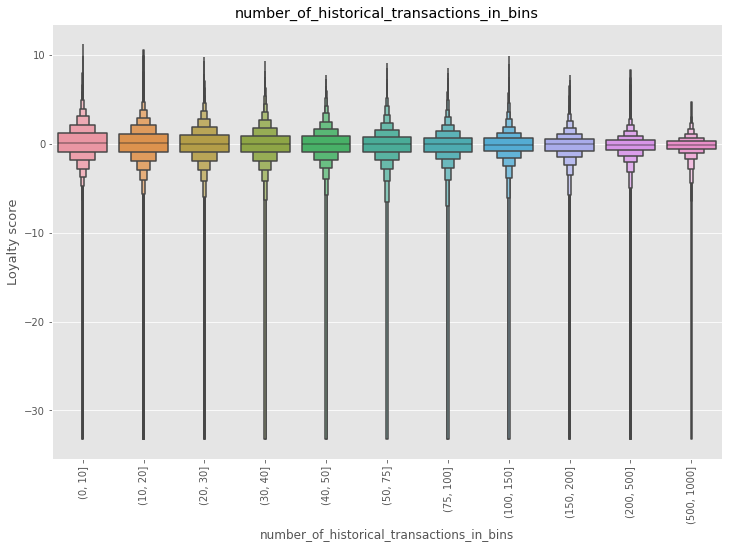

In [ ]:
bins_l = [0, 10, 20, 30, 40, 50, 75, 100, 150, 200, 500, 1000]
data_frame_train['number_of_historical_transactions_in_bins'] = pd.cut(data_frame_train['number_of_historical_transactions'], bins_l)
count_series = data_frame_train.groupby('number_of_historical_transactions_in_bins')[target_feature].mean()
plt.figure(figsize=(12,8))
sns.boxenplot(x='number_of_historical_transactions_in_bins', y=target_feature, data= data_frame_train, showfliers=False)
plt.xticks(rotation='vertical')
plt.xlabel('number_of_historical_transactions_in_bins', fontsize=12)
plt.ylabel('Loyalty score', fontsize=13)
plt.title('number_of_historical_transactions_in_bins')
plt.show()

**Observation:**
- As we seen that we increase the bins size the range of target values is decreasing in historical_transactions 



In [ ]:
group_data_frame = historical_transactions.groupby('card_id')
group_data_frame = group_data_frame['purchase_amount'].agg(['sum', 'mean', 'std', 'min', 'max']).reset_index()
group_data_frame.columns = ['card_id', 'historical_transactions_sum', 'historical_transactions_mean', 'historical_transactions_std', 'historical_transaction_min', 'historical_transactions_max']
data_frame_train = pd.merge(train, group_data_frame, on='card_id', how='left')
data_frame_test = pd.merge(test, group_data_frame, on='card_id', how='left')

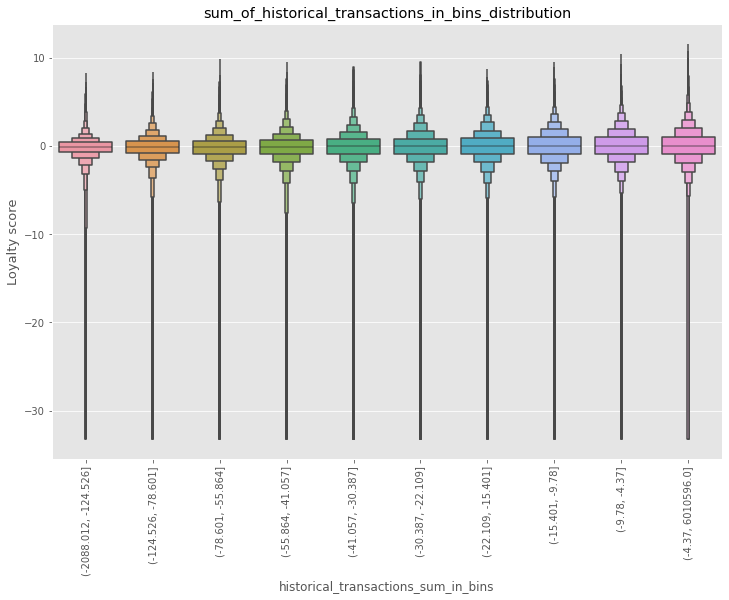

In [ ]:
bins_l = np.percentile(data_frame_train['historical_transactions_sum'], range(0,101,10))
data_frame_train['historical_transactions_sum_in_bins'] = pd.cut(data_frame_train['historical_transactions_sum'], bins_l)
plt.figure(figsize=(12,8))
sns.boxenplot(x='historical_transactions_sum_in_bins', y=target_feature, data=data_frame_train, showfliers=False)
plt.xticks(rotation='vertical')
plt.xlabel('historical_transactions_sum_in_bins', fontsize=12)
plt.ylabel('Loyalty score', fontsize=13)
plt.title('sum_of_historical_transactions_in_bins_distribution')
plt.show()

**Observation:**
- Observations tell us that the loyalty score seems to increase with the 'sum_of_historical_value'. well! this is on the expectation. Let us try the same plot on 'Mean value of historical transaction'



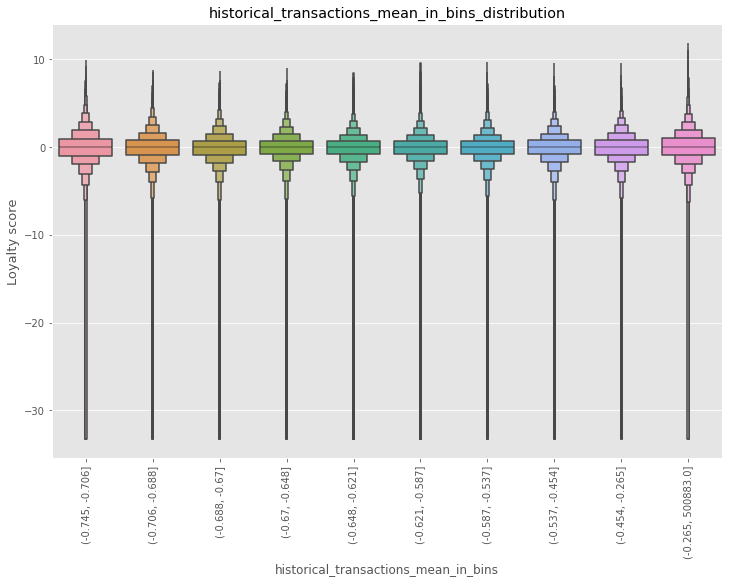

In [ ]:
bins_l = np.percentile(data_frame_train['historical_transactions_mean'], range(0, 101, 10))
data_frame_train['historical_transactions_mean_in_bins'] = pd.cut(data_frame_train['historical_transactions_mean'], bins_l)
plt.figure(figsize=(12,8))
sns.boxenplot(x='historical_transactions_mean_in_bins', y=target_feature, data=data_frame_train, showfliers=False)
plt.xticks(rotation='vertical')
plt.xlabel('historical_transactions_mean_in_bins', fontsize=12)
plt.ylabel('Loyalty score', fontsize=13)
plt.title('historical_transactions_mean_in_bins_distribution')
plt.show()

**Observation:**
- Here we understand that loyaly score first decrease and then increases in mean_binned_historical_transactions.

In [ ]:
historical_transactions['year'] = historical_transactions['purchase_date'].dt.year
historical_transactions['month'] = historical_transactions['purchase_date'].dt.month
historical_transactions['hour'] = historical_transactions['purchase_date'].dt.hour
historical_transactions['dayofweek'] = historical_transactions['purchase_date'].dt.dayofweek
historical_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,year,month,hour,dayofweek
0,1,C_ID_4e6213e9bc,88,0,0,0,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37,2017,6,15,6
1,1,C_ID_4e6213e9bc,88,0,0,0,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16,2017,7,12,5
2,1,C_ID_4e6213e9bc,88,0,0,0,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37,2017,8,22,2
3,1,C_ID_4e6213e9bc,88,0,0,0,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34,2017,9,10,5
4,1,C_ID_4e6213e9bc,88,0,0,0,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37,2017,3,1,4


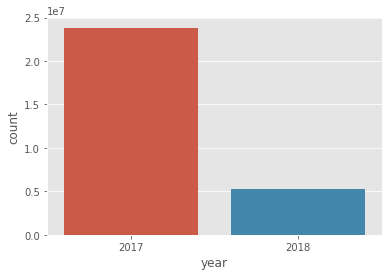

In [ ]:
sns.countplot(x='year', data=historical_transactions)

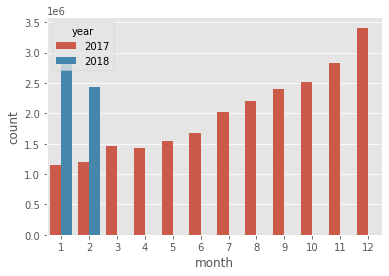

In [ ]:
sns.countplot(x='month', hue='year', data=historical_transactions)

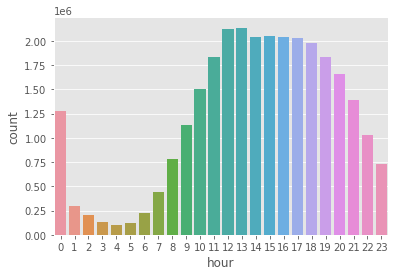

In [ ]:
sns.countplot(x='hour', data=historical_transactions)

([<matplotlib.axis.XTick at 0x7ff6e708c950>,
 [Text(0, 0, 'Mon'),
  Text(0, 0, 'Tue'),
  Text(0, 0, 'Wed'),
  Text(0, 0, 'Thu'),
  Text(0, 0, 'Fri'),
  Text(0, 0, 'Sat'),
  Text(0, 0, 'Sun')])

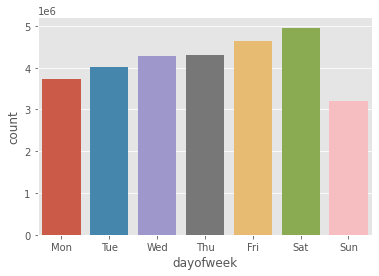

In [ ]:
sns.countplot(x='dayofweek', data=historical_transactions)
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

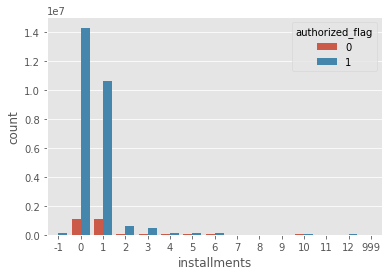

In [ ]:
# authorized_flag 

sns.countplot(x='installments', hue='authorized_flag', data=historical_transactions)

In [ ]:
historical_transactions[historical_transactions['installments'] == 999]['authorized_flag'].value_counts()

0    182
1      6
Name: authorized_flag, dtype: int64

In [ ]:
historical_transactions.head(5)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,year,month,hour,dayofweek
0,1,C_ID_4e6213e9bc,88,0,0,0,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37,2017,6,15,6
1,1,C_ID_4e6213e9bc,88,0,0,0,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16,2017,7,12,5
2,1,C_ID_4e6213e9bc,88,0,0,0,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37,2017,8,22,2
3,1,C_ID_4e6213e9bc,88,0,0,0,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34,2017,9,10,5
4,1,C_ID_4e6213e9bc,88,0,0,0,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37,2017,3,1,4


In [ ]:
clean_historical_transactions = historical_transactions[historical_transactions['purchase_amount'] < 1]

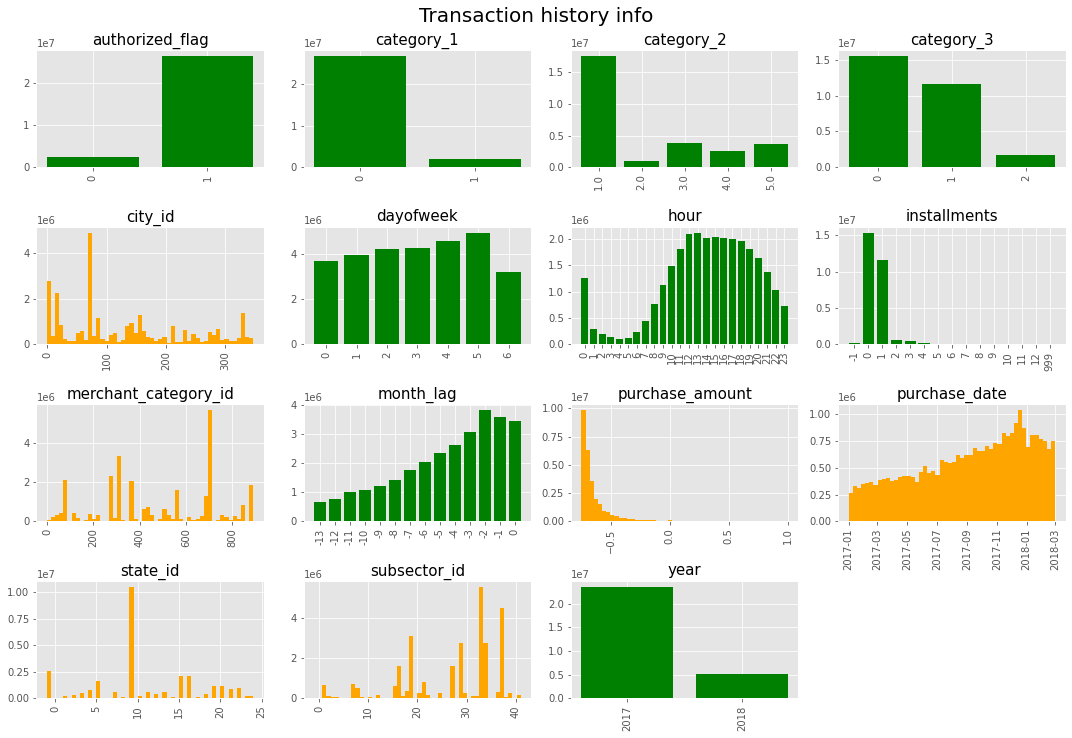

In [ ]:
cat_cols_his = ['authorized_flag', 
            'category_1', 
            'category_2',
            'category_3',
            'installments',
            'month_lag',
            'year', 
            'hour',
            'dayofweek']
num_cols_his = ['merchant_category_id',
            'subsector_id',
            'city_id',
            'state_id',
            'purchase_amount',
            'purchase_date']

plt.figure(figsize=[15, 10])
plt.suptitle('Transaction history info', y=1.02, fontsize=20)
ncols = 4
nrows = int(np.ceil((len(cat_cols_his) + len(num_cols_his))/4))
last_ind = 0
for col in sorted(list(clean_historical_transactions.columns)):
  if col in cat_cols_his:
    last_ind += 1
    plt.subplot(nrows, ncols, last_ind)
    vc = clean_historical_transactions[col].value_counts()
    x = np.array(vc.index)
    y = vc.values
    inds = np.argsort(x)
    x = x[inds].astype(str)
    y = y[inds]
    plt.bar(x, y, color=('green'))
    plt.title(col, fontsize=15)
    plt.xticks(rotation=90)
  if col in num_cols_his:
    last_ind += 1
    plt.subplot(nrows, ncols, last_ind)
    clean_historical_transactions[col].hist(bins = 50, color=('orange'))
    plt.title(col, fontsize=15)
    plt.xticks(rotation=90)
plt.tight_layout()

## **3.3. new_merchant_period**

In [ ]:
new_merchant_period_des = pd.read_excel(new_des_dir, sheet_name='new_merchant_period', skiprows=[0, 1])
new_merchant_period_des

,Columns,Description
0,card_id,Card identifier
1,month_lag,month lag to reference date
2,purchase_date,Purchase date
3,authorized_flag,"Y' if approved, 'N' if denied"
4,category_3,anonymized category
5,installments,number of installments of purchase
6,category_1,anonymized category
7,merchant_category_id,Merchant category identifier (anonymized )
8,subsector_id,Merchant category group identifier (anonymized )
9,merchant_id,Merchant identifier (anonymized)


In [ ]:
new_merchant_period = pd.read_csv(new_dir, parse_dates=['purchase_date'])

In [ ]:
new_merchant_period.shape

(1963031, 14)

In [ ]:
new_merchant_period.isnull().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64

In [ ]:
new_merchant_period['category_2'].value_counts()

1.0    1058242
3.0     289525
5.0     259266
4.0     178590
2.0      65663
Name: category_2, dtype: int64

In [ ]:
new_merchant_period['category_3'].value_counts()

A    922244
B    836178
C    148687
Name: category_3, dtype: int64

In [ ]:
new_merchant_period['merchant_id'].value_counts()

M_ID_00a6ca8a8a    23018
M_ID_cd2c0b07e9    19118
M_ID_9139332ccc    14220
M_ID_50f575c681    13778
M_ID_725a60d404     7029
                   ...  
M_ID_f4f454f072        1
M_ID_39e47d2886        1
M_ID_3308a2950d        1
M_ID_c91089987b        1
M_ID_55f10cb98a        1
Name: merchant_id, Length: 226129, dtype: int64

In [ ]:
new_merchant_period['category_2'].fillna(1.0, inplace=True)
new_merchant_period['category_3'].fillna('A', inplace=True)
new_merchant_period['merchant_id'].fillna('M_ID_00a6ca8a8a', inplace=True)

In [ ]:
new_merchant_period.replace([-np.inf, np.inf], np.nan, inplace=True)
new_merchant_period['category_3'].replace({'A':0, 'B':1, 'C':2}, inplace=True)
new_merchant_period['category_1'].replace({'N':0, 'Y':1}, inplace=True)
new_merchant_period['authorized_flag'].replace({'N':0, 'Y':1}, inplace=True)

In [ ]:
new_merchant_period = reduce_mem_usage(new_merchant_period)

Mem. usage decreased to 74.88 Mb (64.3% reduction)


In [ ]:
new_merchant_period.head(10)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,1,C_ID_415bb3a509,107,0,1,1,307,M_ID_b0c793002c,1,-0.557617,2018-03-11 14:57:36,1.0,9,19
1,1,C_ID_415bb3a509,140,0,1,1,307,M_ID_88920c89e8,1,-0.569336,2018-03-19 18:53:37,1.0,9,19
2,1,C_ID_415bb3a509,330,0,1,1,507,M_ID_ad5237ef6b,2,-0.551270,2018-04-26 14:08:44,1.0,9,14
3,1,C_ID_415bb3a509,-1,1,1,1,661,M_ID_9e84cda3b1,1,-0.671875,2018-03-07 09:43:21,1.0,-1,8
4,1,C_ID_ef55cf8d4b,-1,1,1,1,166,M_ID_3c86fa3831,1,-0.659668,2018-03-22 21:07:53,1.0,-1,29
5,1,C_ID_ef55cf8d4b,231,0,1,1,367,M_ID_8874615e00,2,-0.632812,2018-04-02 12:53:28,1.0,9,16
6,1,C_ID_ef55cf8d4b,69,0,1,1,333,M_ID_6d061b5ddc,1,5.265625,2018-03-28 19:50:19,1.0,9,10
7,1,C_ID_ef55cf8d4b,231,0,1,1,307,M_ID_df1e022f41,2,-0.553711,2018-04-05 08:06:52,1.0,9,19
8,1,C_ID_ef55cf8d4b,69,0,1,1,278,M_ID_d15eae0468,2,-0.596680,2018-04-07 18:37:40,1.0,9,37
9,1,C_ID_ef55cf8d4b,69,0,1,1,437,M_ID_5f9bffd028,1,-0.607422,2018-03-17 18:10:41,1.0,9,15


In [ ]:
new_merchant_period.describe()

,authorized_flag,city_id,category_1,installments,category_3,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,1963031.0,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1963031.0,1.963031e+06,1.963031e+06
mean,1.0,1.343867e+02,3.214213e-02,6.829643e-01,5.774499e-01,4.309701e+02,1.476515e+00,NaN,NaN,1.088067e+01,2.597624e+01
std,0.0,1.015152e+02,1.763775e-01,1.584069e+00,6.288791e-01,2.463385e+02,4.994483e-01,NaN,0.0,6.038542e+00,1.012908e+01
min,1.0,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,1.000000e+00,-7.470703e-01,1.0,-1.000000e+00,-1.000000e+00
25%,1.0,6.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.780000e+02,1.000000e+00,-7.167969e-01,1.0,9.000000e+00,1.900000e+01
50%,1.0,1.100000e+02,0.000000e+00,1.000000e+00,1.000000e+00,3.670000e+02,1.000000e+00,-6.748047e-01,1.0,9.000000e+00,2.900000e+01
75%,1.0,2.120000e+02,0.000000e+00,1.000000e+00,1.000000e+00,6.830000e+02,2.000000e+00,-5.815430e-01,3.0,1.500000e+01,3.400000e+01
max,1.0,3.470000e+02,1.000000e+00,9.990000e+02,2.000000e+00,8.910000e+02,2.000000e+00,2.632500e+02,5.0,2.400000e+01,4.100000e+01


In [ ]:
new_merchant_period.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
 #   Column                Dtype         
---  ------                -----         
 0   authorized_flag       int8          
 1   card_id               object        
 2   city_id               int16         
 3   category_1            int8          
 4   installments          int16         
 5   category_3            int8          
 6   merchant_category_id  int16         
 7   merchant_id           object        
 8   month_lag             int8          
 9   purchase_amount       float16       
 10  purchase_date         datetime64[ns]
 11  category_2            float16       
 12  state_id              int8          
 13  subsector_id          int8          
dtypes: datetime64[ns](1), float16(2), int16(3), int8(6), object(2)
memory usage: 74.9+ MB


In [ ]:
group_data_frame = new_merchant_period.groupby('card_id')
group_data_frame = group_data_frame['purchase_amount'].size().reset_index()
group_data_frame.columns = ['card_id', 'number_of_new_transactions']
data_frame_train = pd.merge(train, group_data_frame, on='card_id', how='left')
data_frame_test = pd.merge(test, group_data_frame, on='card_id', how='left')

In [ ]:
data_frame_train

,first_active_month,card_id,feature_1,feature_2,feature_3,target,number_of_new_transactions
0,2017-06,C_ID_92a2005557,5,2,1,-0.820312,23.0
1,2017-01,C_ID_3d0044924f,4,1,0,0.392822,6.0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.687988,1.0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142456,7.0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159790,36.0
...,...,...,...,...,...,...,...
201912,2017-09,C_ID_963962de2c,3,2,1,-2.740234,1.0
201913,2015-10,C_ID_1314773c0b,3,1,1,0.312988,1.0
201914,2017-08,C_ID_7666735b3d,4,3,0,0.093506,3.0
201915,2016-07,C_ID_73f5a0efd0,3,2,1,-4.675781,5.0


In [ ]:
data_frame_train[data_frame_train['target'] == -33.218750]['number_of_new_transactions'].sum()

7461.0

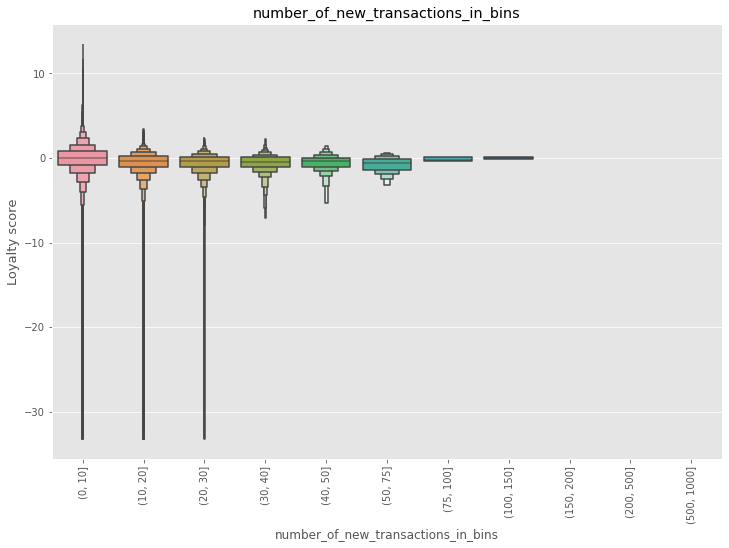

In [ ]:
bins_l = [0, 10, 20, 30, 40, 50, 75, 100, 150, 200, 500, 1000]
data_frame_train['number_of_new_transactions_in_bins'] = pd.cut(data_frame_train['number_of_new_transactions'], bins_l)
count_series = data_frame_train.groupby('number_of_new_transactions_in_bins')[target_feature].mean()
plt.figure(figsize=(12,8))
sns.boxenplot(x='number_of_new_transactions_in_bins', y=target_feature, data= data_frame_train, showfliers=False)
plt.xticks(rotation='vertical')
plt.xlabel('number_of_new_transactions_in_bins', fontsize=12)
plt.ylabel('Loyalty score', fontsize=13)
plt.title('number_of_new_transactions_in_bins')
plt.show()

In [ ]:
new_merchant_period['year'] = new_merchant_period['purchase_date'].dt.year
new_merchant_period['month'] = new_merchant_period['purchase_date'].dt.month
new_merchant_period['hour'] = new_merchant_period['purchase_date'].dt.hour
new_merchant_period['dayofweek'] = new_merchant_period['purchase_date'].dt.dayofweek
new_merchant_period.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,year,month,hour,dayofweek
0,1,C_ID_415bb3a509,107,0,1,1,307,M_ID_b0c793002c,1,-0.557617,2018-03-11 14:57:36,1.0,9,19,2018,3,14,6
1,1,C_ID_415bb3a509,140,0,1,1,307,M_ID_88920c89e8,1,-0.569336,2018-03-19 18:53:37,1.0,9,19,2018,3,18,0
2,1,C_ID_415bb3a509,330,0,1,1,507,M_ID_ad5237ef6b,2,-0.551270,2018-04-26 14:08:44,1.0,9,14,2018,4,14,3
3,1,C_ID_415bb3a509,-1,1,1,1,661,M_ID_9e84cda3b1,1,-0.671875,2018-03-07 09:43:21,1.0,-1,8,2018,3,9,2
4,1,C_ID_ef55cf8d4b,-1,1,1,1,166,M_ID_3c86fa3831,1,-0.659668,2018-03-22 21:07:53,1.0,-1,29,2018,3,21,3


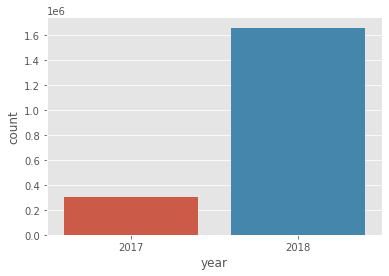

In [ ]:
sns.countplot(x='year', data=new_merchant_period)

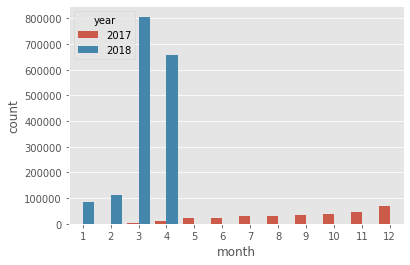

In [ ]:
sns.countplot(x='month', hue='year', data=new_merchant_period)

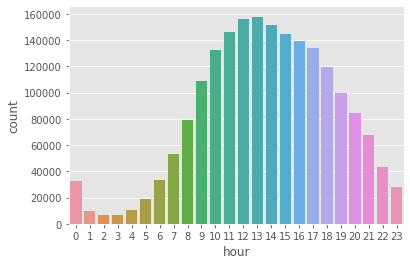

In [ ]:
sns.countplot(x='hour', data=new_merchant_period)

([<matplotlib.axis.XTick at 0x7ff6def6c9d0>,
 [Text(0, 0, 'Mon'),
  Text(0, 0, 'Tue'),
  Text(0, 0, 'Wed'),
  Text(0, 0, 'Thu'),
  Text(0, 0, 'Fri'),
  Text(0, 0, 'Sat'),
  Text(0, 0, 'Sun')])

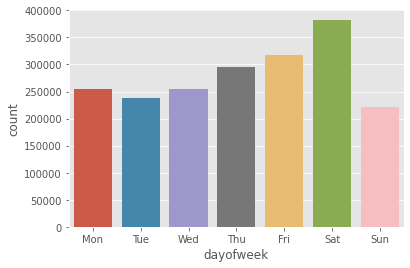

In [ ]:
sns.countplot(x='dayofweek', data=new_merchant_period)
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

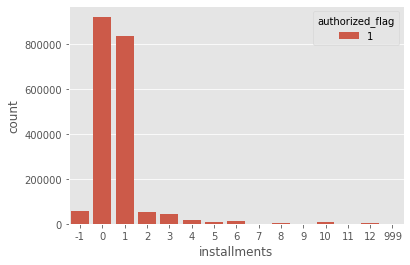

In [ ]:
# authorized_flag 

sns.countplot(x='installments', hue='authorized_flag', data=new_merchant_period)

In [ ]:
new_merchant_period.head(5)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,year,month,hour,dayofweek
0,1,C_ID_415bb3a509,107,0,1,1,307,M_ID_b0c793002c,1,-0.557617,2018-03-11 14:57:36,1.0,9,19,2018,3,14,6
1,1,C_ID_415bb3a509,140,0,1,1,307,M_ID_88920c89e8,1,-0.569336,2018-03-19 18:53:37,1.0,9,19,2018,3,18,0
2,1,C_ID_415bb3a509,330,0,1,1,507,M_ID_ad5237ef6b,2,-0.551270,2018-04-26 14:08:44,1.0,9,14,2018,4,14,3
3,1,C_ID_415bb3a509,-1,1,1,1,661,M_ID_9e84cda3b1,1,-0.671875,2018-03-07 09:43:21,1.0,-1,8,2018,3,9,2
4,1,C_ID_ef55cf8d4b,-1,1,1,1,166,M_ID_3c86fa3831,1,-0.659668,2018-03-22 21:07:53,1.0,-1,29,2018,3,21,3


In [ ]:
clean_new_merchant_period = new_merchant_period[new_merchant_period['purchase_amount'] < 2]

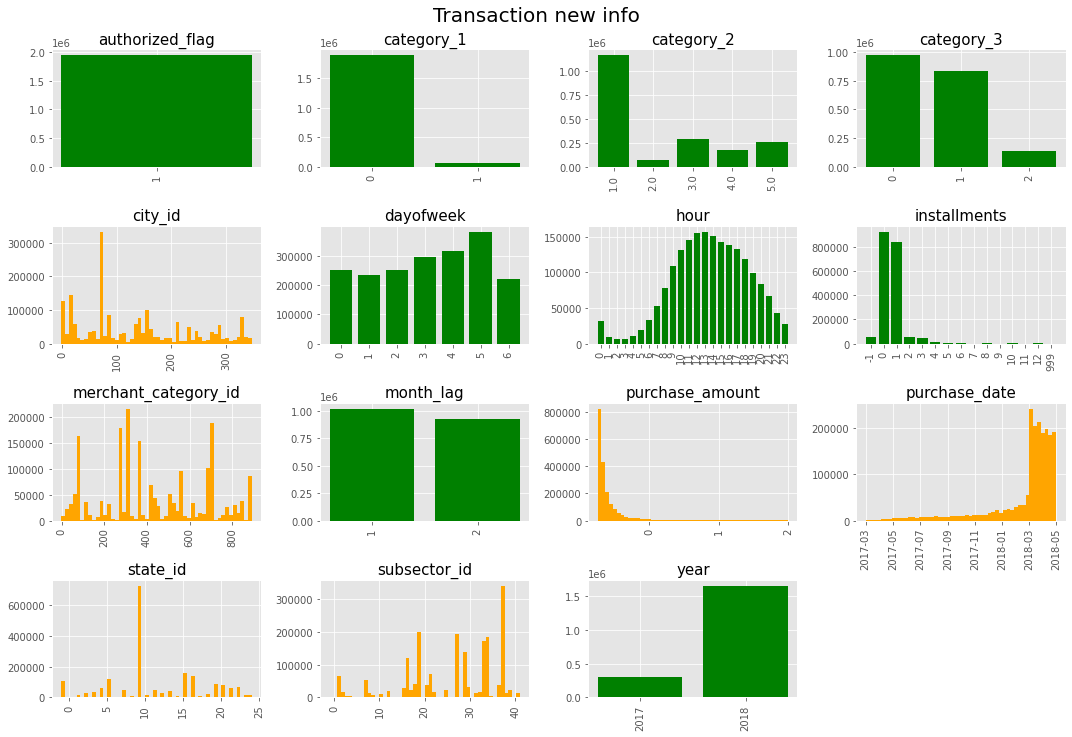

In [ ]:
cat_cols_his = ['authorized_flag', 
            'category_1', 
            'category_2',
            'category_3',
            'installments',
            'month_lag',
            'year', 
            'hour',
            'dayofweek']
num_cols_his = ['merchant_category_id',
            'subsector_id',
            'city_id',
            'state_id',
            'purchase_amount',
            'purchase_date']

plt.figure(figsize=[15, 10])
plt.suptitle('Transaction new info', y=1.02, fontsize=20)
ncols = 4
nrows = int(np.ceil((len(cat_cols_his) + len(num_cols_his))/4))
last_ind = 0
for col in sorted(list(clean_new_merchant_period.columns)):
  if col in cat_cols_his:
    last_ind += 1
    plt.subplot(nrows, ncols, last_ind)
    vc = clean_new_merchant_period[col].value_counts()
    x = np.array(vc.index)
    y = vc.values
    inds = np.argsort(x)
    x = x[inds].astype(str)
    y = y[inds]
    plt.bar(x, y, color=('green'))
    plt.title(col, fontsize=15)
    plt.xticks(rotation=90)
  if col in num_cols_his:
    last_ind += 1
    plt.subplot(nrows, ncols, last_ind)
    clean_new_merchant_period[col].hist(bins = 50, color=('orange'))
    plt.title(col, fontsize=15)
    plt.xticks(rotation=90)
plt.tight_layout()

**Observation:**
- All transactions in this table are authorized, so we can safely drop this column
- Same insight as historical_transactions

## **3.4. merchants**

In [ ]:
merchants_des = pd.read_excel(mer_des_dir, sheet_name='merchant', skiprows=[0, 1])
merchants_des

,Columns,Description
0,merchant_id,Unique merchant identifier
1,merchant_group_id,Merchant group (anonymized )
2,merchant_category_id,Unique identifier for merchant category (anony...
3,subsector_id,Merchant category group (anonymized )
4,numerical_1,anonymized measure
5,numerical_2,anonymized measure
6,category_1,anonymized category
7,most_recent_sales_range,Range of revenue (monetary units) in last acti...
8,most_recent_purchases_range,Range of quantity of transactions in last acti...
9,avg_sales_lag3,Monthly average of revenue in last 3 months di...


In [ ]:
merchants = pd.read_csv(mer_dir)

In [ ]:
merchants.shape

(334696, 22)

In [ ]:
merchants.isnull().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

In [ ]:
merchants['avg_sales_lag3'].median()

1.0

In [ ]:
merchants['avg_sales_lag6'].median()

1.01

In [ ]:
merchants['avg_sales_lag12'].median()

1.02

In [ ]:
merchants['category_2'].value_counts()

1.0    160888
5.0     52923
3.0     51887
4.0     36450
2.0     20661
Name: category_2, dtype: int64

In [ ]:
merchants['avg_sales_lag3'].fillna(1.0, inplace=True)
merchants['avg_sales_lag6'].fillna(1.01, inplace=True)
merchants['avg_sales_lag12'].fillna(1.02, inplace=True)
merchants['category_2'].fillna(1.0, inplace=True)

In [ ]:
merchants.replace([-np.inf, np.inf], np.nan, inplace=True)
merchants['category_1'].replace({'N':0, 'Y':1}, inplace=True)
merchants['category_4'].replace({'N':0, 'Y':1}, inplace=True)
merchants['most_recent_sales_range'].replace({'A':4, 'B':3, 'C':2, 'D':1, 'E':0}, inplace=True)
merchants['most_recent_purchases_range'].replace({'A':4, 'B':3, 'C':2, 'D':1, 'E':0}, inplace=True)

In [ ]:
merchants.head(10)

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,0,0,0,-0.40,9.666667,3,-2.25,18.666667,6,-2.32,13.916667,12,0,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,0,0,0,-0.72,1.750000,3,-0.74,1.291667,6,-0.57,1.687500,12,0,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,0,0,0,-82.13,260.000000,2,-82.13,260.000000,2,-82.13,260.000000,2,0,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,1,0,0,1.00,1.666667,3,1.01,4.666667,6,1.02,3.833333,12,1,-1,-1,1.0
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,1,0,0,1.00,0.500000,3,1.01,0.361111,6,1.02,0.347222,12,1,-1,-1,1.0
5,M_ID_a0915f62b5,20201,87,27,-0.057471,-0.057471,0,0,0,1.00,1.000000,3,1.01,3.666667,6,1.02,3.833333,12,1,160,21,5.0
6,M_ID_bfd41933db,33861,792,9,-0.057471,-0.057471,0,0,0,1.00,2.833333,3,1.01,4.833333,6,1.02,6.333333,12,0,60,16,1.0
7,M_ID_d8ff08219e,16430,529,20,-0.057471,-0.057471,1,0,0,1.00,1.000000,3,1.01,1.666667,6,1.02,1.500000,11,1,-1,-1,1.0
8,M_ID_c5b389236d,37179,813,29,-0.057471,-0.057471,0,0,0,1.00,115.000000,3,1.01,189.916667,6,1.02,197.000000,7,0,248,15,1.0
9,M_ID_d2162ed113,112122,81,29,-0.057471,-0.057471,1,0,0,1.00,1.000000,2,1.01,1.000000,2,1.02,1.000000,2,1,-1,-1,1.0


In [ ]:
merchants.describe()

,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334693.000000,334696.000000,3.346960e+05,334693.000000,334696.000000,3.346960e+05,334693.000000,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000
mean,31028.736143,423.131663,25.116404,0.011476,0.008103,0.021031,0.611767,0.617435,13.832494,1.590762,2.994108,2.164999e+01,1.887568,5.947397,2.522677e+01,2.079195,11.599335,0.287126,102.917926,11.860942,2.330990
std,31623.043426,252.898046,9.807371,1.098154,1.070497,0.143488,0.753297,0.752935,2395.443478,107.187059,0.095247,3.947031e+03,97.862790,0.394936,5.251740e+03,88.442384,1.520138,0.452422,107.090673,6.176889,1.555769
min,1.000000,-1.000000,-1.000000,-0.057471,-0.057471,0.000000,0.000000,0.000000,-82.130000,0.333495,1.000000,-8.213000e+01,0.167045,1.000000,-8.213000e+01,0.098330,1.000000,0.000000,-1.000000,-1.000000,1.000000
25%,3612.000000,222.000000,19.000000,-0.057471,-0.057471,0.000000,0.000000,0.000000,0.880000,0.923650,3.000000,8.500000e-01,0.902245,6.000000,8.500000e-01,0.898333,12.000000,0.000000,-1.000000,9.000000,1.000000
50%,19900.000000,373.000000,27.000000,-0.057471,-0.057471,0.000000,0.000000,0.000000,1.000000,1.016667,3.000000,1.010000e+00,1.026961,6.000000,1.020000e+00,1.043360,12.000000,0.000000,69.000000,9.000000,1.000000
75%,51707.250000,683.000000,33.000000,-0.047556,-0.047556,0.000000,1.000000,1.000000,1.160000,1.146520,3.000000,1.230000e+00,1.215556,6.000000,1.290000e+00,1.266461,12.000000,1.000000,182.000000,16.000000,4.000000
max,112586.000000,891.000000,41.000000,183.735111,182.079322,1.000000,4.000000,4.000000,851844.640000,61851.333333,3.000000,1.513959e+06,56077.500000,6.000000,2.567408e+06,50215.555556,12.000000,1.000000,347.000000,24.000000,5.000000


In [ ]:
merchants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_id                  334696 non-null  object 
 1   merchant_group_id            334696 non-null  int64  
 2   merchant_category_id         334696 non-null  int64  
 3   subsector_id                 334696 non-null  int64  
 4   numerical_1                  334696 non-null  float64
 5   numerical_2                  334696 non-null  float64
 6   category_1                   334696 non-null  int64  
 7   most_recent_sales_range      334696 non-null  int64  
 8   most_recent_purchases_range  334696 non-null  int64  
 9   avg_sales_lag3               334696 non-null  float64
 10  avg_purchases_lag3           334693 non-null  float64
 11  active_months_lag3           334696 non-null  int64  
 12  avg_sales_lag6               334696 non-null  float64
 13 

In [ ]:
clean_merchants = merchants.loc[(merchants['numerical_1'] < 0.1) &
                               (merchants['numerical_2'] < 0.1) &
                               (merchants['avg_sales_lag3'] < 5) &
                               (merchants['avg_purchases_lag3'] < 5) &
                               (merchants['avg_sales_lag6'] < 10) &
                               (merchants['avg_purchases_lag6'] < 10) &
                               (merchants['avg_sales_lag12'] < 10) &
                               (merchants['avg_purchases_lag12'] < 10)]

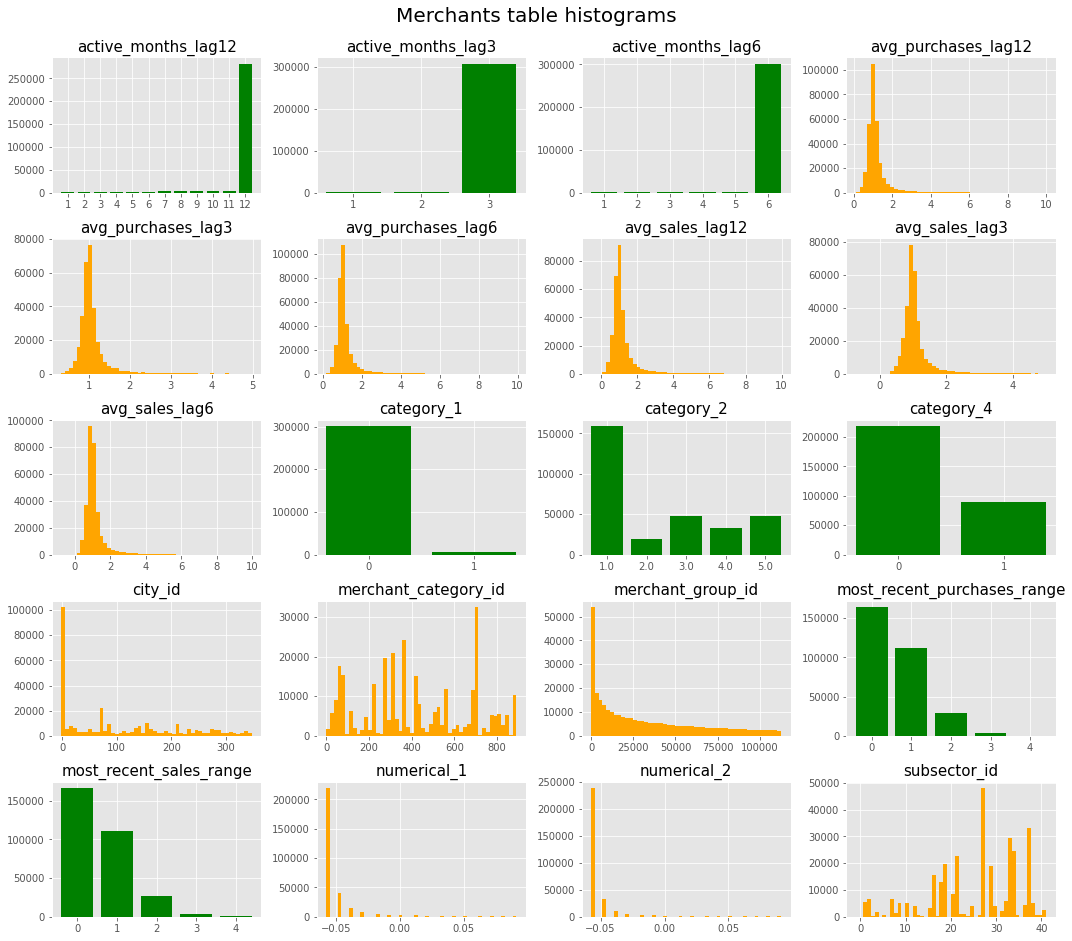

In [ ]:
cat_cols = ['active_months_lag3',
            'active_months_lag6',
            'active_months_lag12',
            'most_recent_sales_range', 
            'most_recent_purchases_range',
            'category_1',
            'category_2', 
            'category_4']
num_cols = ['merchant_group_id',
            'merchant_category_id',
            'subsector_id',
            'city_id',
            'group_id',
            'numerical_1', 
            'numerical_2',
            'avg_sales_lag3', 
            'avg_purchases_lag3', 
            'avg_sales_lag6', 
            'avg_purchases_lag6', 
            'avg_sales_lag12', 
            'avg_purchases_lag12']

plt.figure(figsize=[15, 15])
plt.suptitle('Merchants table histograms', y=1.02, fontsize=20)
ncols = 4
nrows = int(np.ceil((len(cat_cols_mer) + len(num_cols_mer))/4))
last_ind = 0
for col in sorted(list(clean_merchants.columns)):
    if col in cat_cols_mer:
        last_ind += 1
        plt.subplot(nrows, ncols, last_ind)
        vc = clean_merchants[col].value_counts()
        x = np.array(vc.index)
        y = vc.values
        inds = np.argsort(x)
        x = x[inds].astype(str)
        y = y[inds]
        plt.bar(x, y, color=('green'))
        plt.title(col, fontsize=15)
    if col in num_cols_mer:
        last_ind += 1
        plt.subplot(nrows, ncols, last_ind)
        clean_merchants[col].hist(bins = 50, color=('orange'))
        plt.title(col, fontsize=15)
    plt.tight_layout()

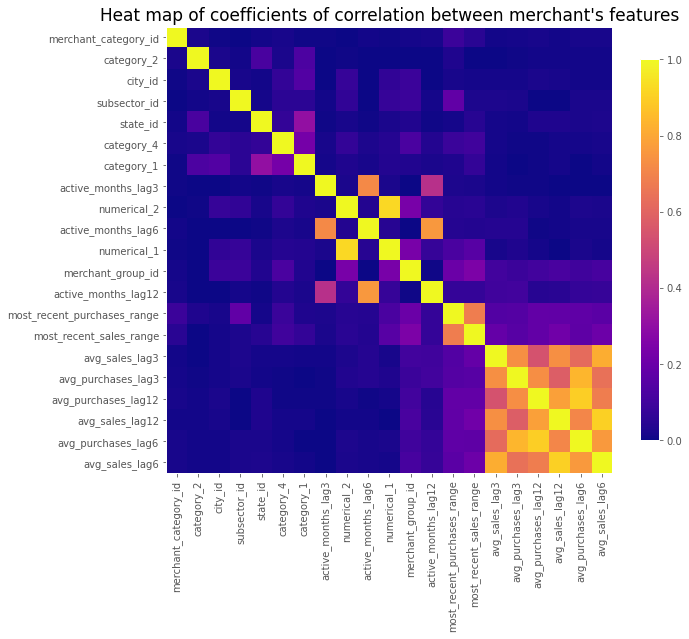

In [ ]:
corrs = np.abs(clean_merchants.corr())
ordered_cols = (corrs).sum().sort_values().index
plt.figure(figsize=[10,10])
plt.imshow(corrs.loc[ordered_cols, ordered_cols], cmap='plasma', vmin=0, vmax=1)
plt.colorbar(shrink=0.7)
plt.xticks(range(corrs.shape[0]), list(ordered_cols), rotation=90)
plt.yticks(range(corrs.shape[0]), list(ordered_cols))
plt.title('Heat map of coefficients of correlation between merchant\'s features', fontsize=17)
plt.grid(False)
plt.show()

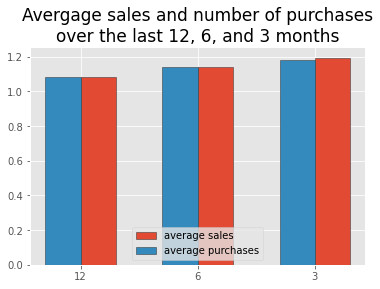

In [ ]:
x = np.array([12, 6, 3]).astype(str)
sales_rates = clean_merchants[['avg_sales_lag3', 'avg_sales_lag6', 'avg_sales_lag12']].mean().values
purchase_rates = clean_merchants[['avg_purchases_lag3', 'avg_purchases_lag6', 'avg_purchases_lag12']].mean().values
plt.bar(x, sales_rates, width=0.3, align='edge', label='average sales', edgecolor=[0.2]*3)
plt.bar(x, purchase_rates, width=-0.3, align='edge', label='average purchases', edgecolor=[0.2]*3)
plt.legend()
plt.title('Avergage sales and number of purchases\nover the last 12, 6, and 3 months', fontsize=17)
plt.show()

**Observation:**
- active_months_lag 3 and 6 are basically truncated versions of active_months_12, so they can be dropped